In [88]:
import numpy as np
%pylab inline
from matplotlib import pyplot as plt
import csv

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['nan']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [89]:
with open('Cycle1RAD_Tmp.csv', newline='') as csvfile:
# 讀取 CSV 檔案內容
        rows = csv.reader(csvfile)
        data = list(rows)
    

In [90]:
len(data)

58414

In [91]:
length = int((len(data)))
tmp =np.zeros((length))
R1 =np.zeros((length))
R2 =np.zeros((length))
for i in range(len(data)):
    tmp[i] =   data[i][0]
    R1[i] =    data[i][1]
    R2[i] =    data[i][2]

In [92]:
tem_ = np.arange(int(min(tmp)), int(max(tmp)))
temperature = []
R1_avg = []
R2_avg = []
i = 0
nan = np.float64('nan')
for j in range(len(tem_)):
    data1=[]
    data2=[]
    while(tmp[i] == tem_[j]):
        data1 = np.append(data1, R1[i])
        data2 = np.append(data2, R2[i])
        i+=1
    dataR1=np.mean(data1)
    dataR2=np.mean(data2)
    # print(dataR1)
    if (np.isnan(dataR1) == False):
        temperature = np.append(temperature, tem_[j])
        R1_avg = np.append(R1_avg, dataR1)
        R2_avg = np.append(R2_avg,dataR2)


In [93]:
def polynomial(x,y,m):
    n=len(x)
    A=np.zeros((m+1,m+1))
    B=np.zeros((m+1,1))

    for i in range(m+1):
        B[i,0]= sum((x**i)*y)
        for j in range(m+1):
            if i == j == 0 :
                A[i,j]=n
            else:
                A[i,j]=sum(x**(i+j))
    
    c=np.linalg.inv(A)@B # find  sol （ 找出矩陣 Ax=B 的 x ）
    # c ＝ 高斯法 guass(A,B)
    return c # 回傳係數

def func(u,w):
    x=0
    for i in range(len(w)):
        x+=w[i]*u**i
    return x

def plt_fig(x,y):
    n=3
    w=polynomial(x,y,n) #n次方多項式
    x_temp=np.linspace(0,80,100)
    plt.plot(x_temp,func(x_temp,w),'r')   
    plt.scatter(x,y) 
    plt.show

def coef(x,y):
    x_av=np.mean(x)
    y_av=np.mean(y)
    to=0; bo1=0; bo2=0; 
    for i in range(len(x)) :
        to += (x[i]-x_av)*(y[i]-y_av)
        bo1 += (x[i]-x_av)**2
        bo2 += (y[i]-y_av)**2
    r=to / np.sqrt(bo1*bo2) 
    return r

(3.0, 60.0, 1.39, 1.42)

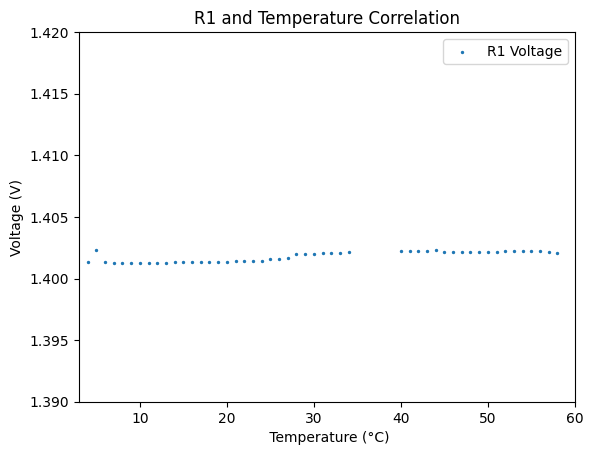

In [94]:
# R1_C = np.around(coef(tmp,R1),3)
# w=polynomial(tmp,R1,3) #n次方多項式
# x_temp=np.linspace(0,80,100)
# plt.plot(x_temp,func(x_temp,w),'b',label=f'r = {R1_C}') 
# # plt.plot(tmp,R1,'b',label=f'r = {R1_C}')
# plt.legend() 
# plt.scatter(tmp,R1,s=1)
# plt.scatter(temperature,R1_avg,s=2)

R1_C = np.around(coef(temperature,R1_avg),3)
w=polynomial(temperature,R1_avg,3) #n次方多項式
x_temp=np.linspace(0,80,100)
# plt.plot(x_temp,func(x_temp,w),'b',label=f'r = {R1_C}') 
# plt.plot(tmp,R1,'b',label=f'r = {R1_C}')

plt.scatter(temperature,R1_avg,s=2,label=f'R1 Voltage')
plt.legend() 
# plt.plot(temperature,R1_avg)
plt.xlabel(" Temperature (°C)")
plt.ylabel("Voltage (V)")
plt.title(f'R1 and Temperature Correlation') 
plt.axis([3, 60, 1.39,1.42])

(3.0, 60.0, 1.34, 1.37)

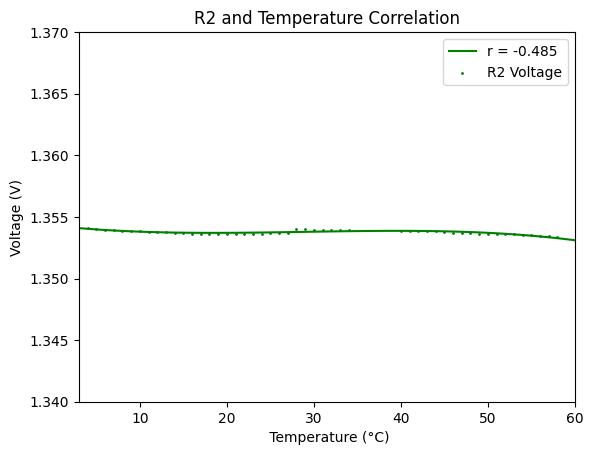

In [95]:
# R2_C = np.around(coef(tmp,R2),3)
# w=polynomial(tmp,R2,3) #n次方多項式
# x_temp=np.linspace(0,80,100)
# plt.plot(x_temp,func(x_temp,w),'g',label=f'r = {R2_C}')
# # plt.plot(tmp,R2,'g',label=f'r = {R2_C}')
# plt.legend() 
# plt.scatter(tmp,R2,s=1,c ='g')
# plt.plot(temperature,R2_avg,'g-')

R2_C = np.around(coef(temperature,R2_avg),3)
w=polynomial(temperature,R2_avg,3) #n次方多項式
x_temp=np.linspace(0,80,100)
plt.plot(x_temp,func(x_temp,w),'g',label=f'r = {R2_C}')
plt.scatter(temperature,R2_avg,s=1,c ='g',label=f'R2 Voltage')
plt.legend() 
plt.xlabel(" Temperature (°C)")
plt.ylabel("Voltage (V)")
plt.title(f'R2 and Temperature Correlation') 
# plt.axis([3, 60, 1.352,1.356])
plt.axis([3, 60, 1.34,1.37])

(3.0, 60.0, 1.33, 1.42)

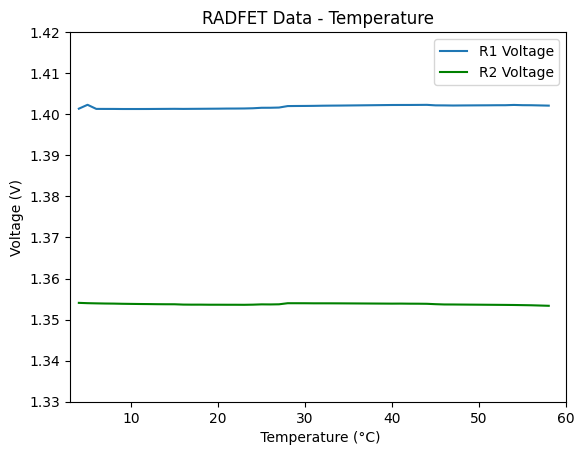

In [96]:
plt.plot(temperature,R1_avg,label=f'R1 Voltage')
plt.plot(temperature,R2_avg,'g-',label=f'R2 Voltage')
plt.legend() 

plt.xlabel(" Temperature (°C)")
plt.ylabel("Voltage (V)")
plt.title(f'RADFET Data - Temperature') 
plt.axis([3, 60, 1.33,1.42])